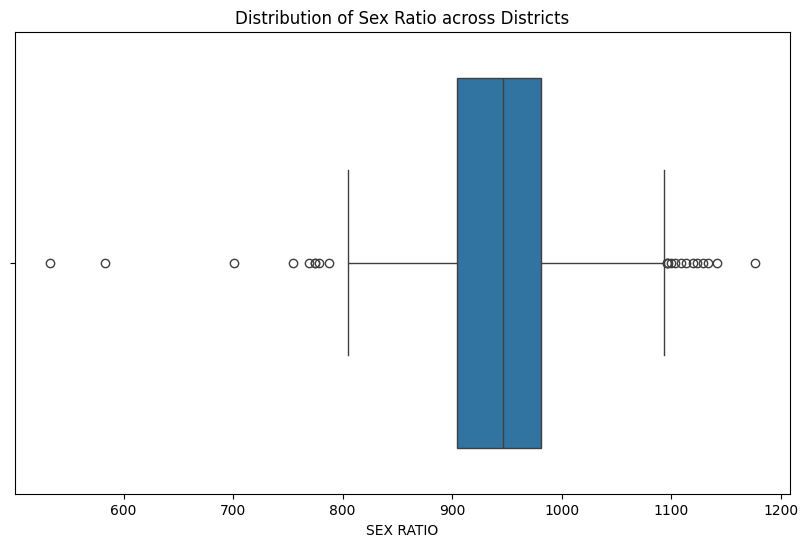

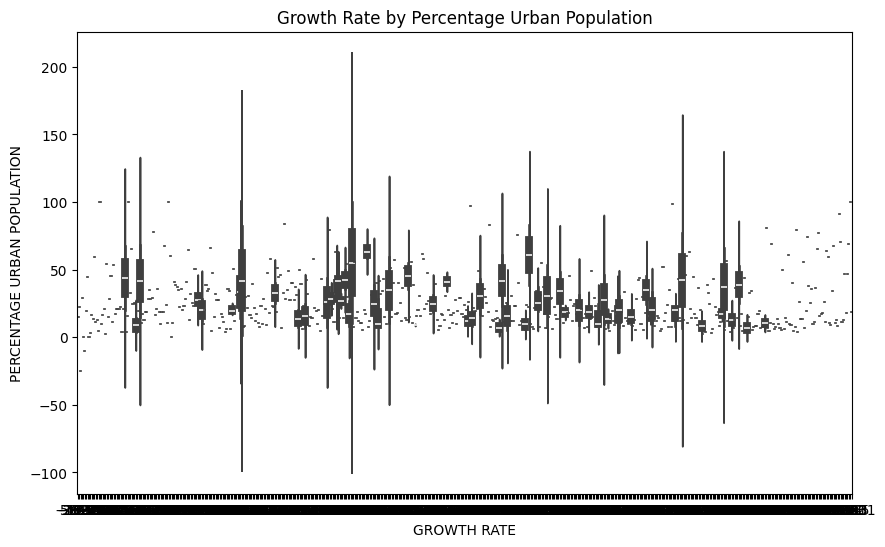

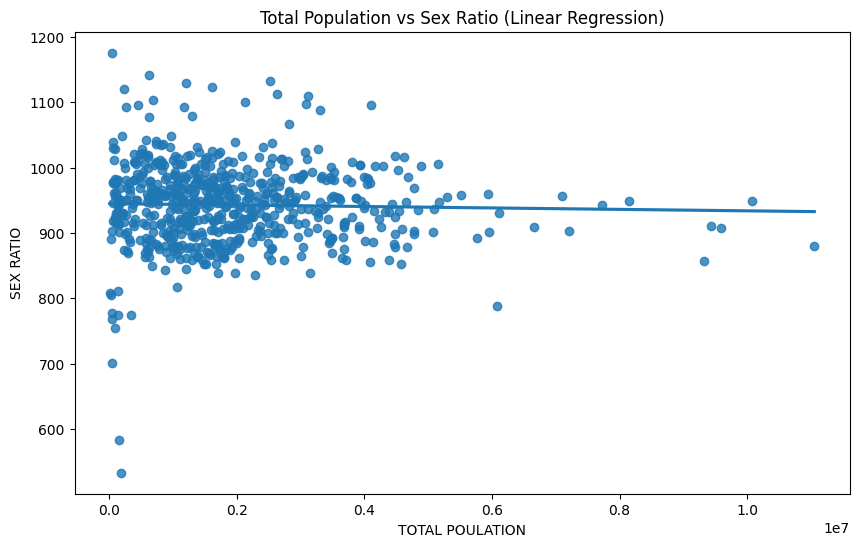

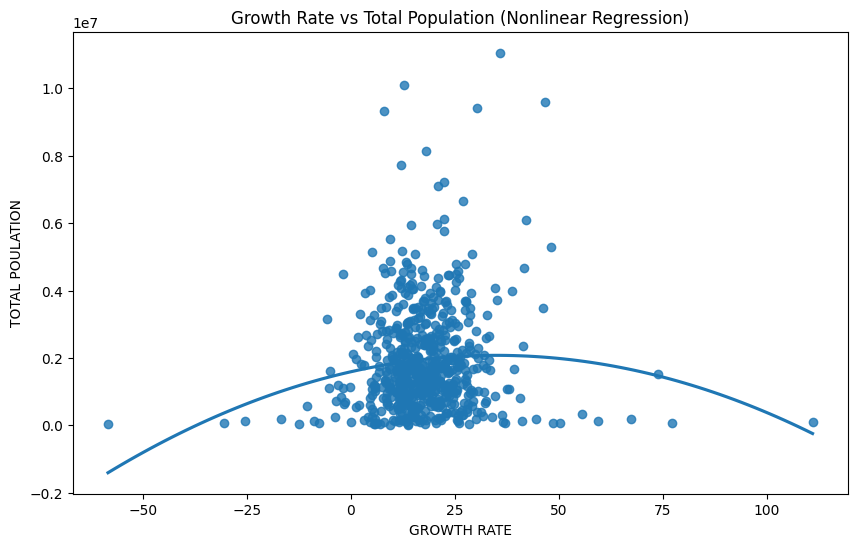

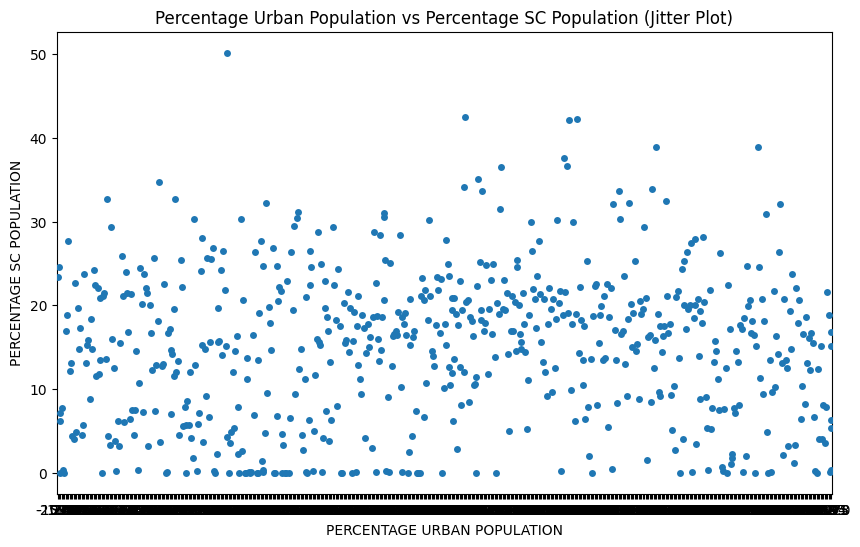

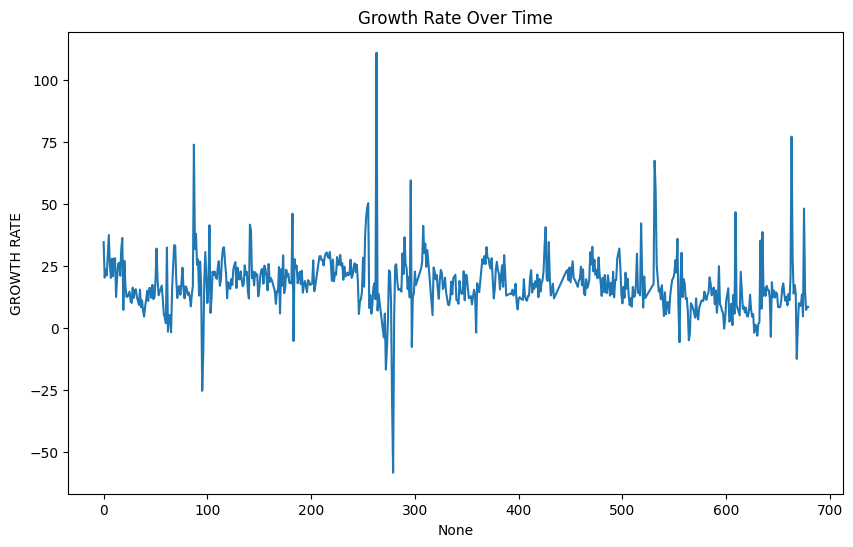

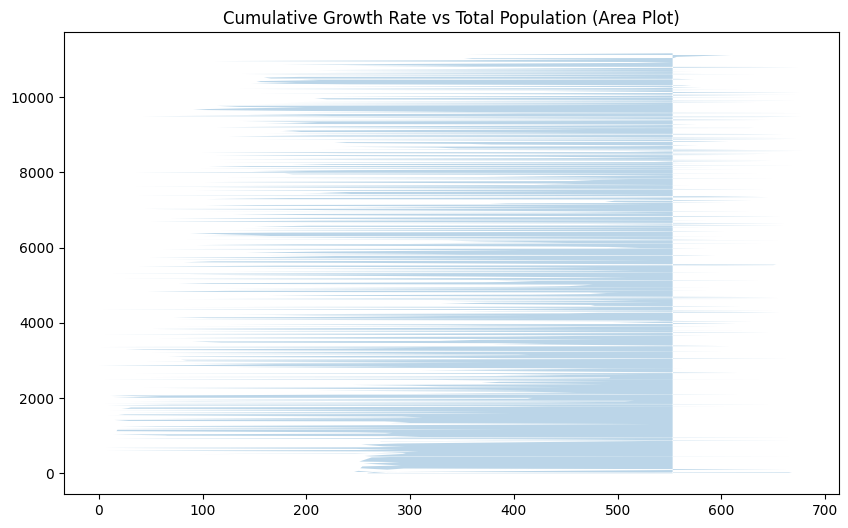

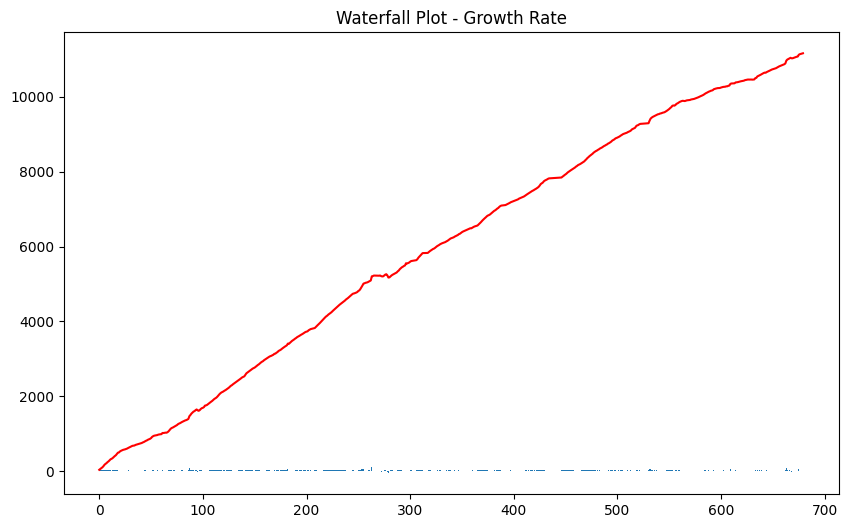

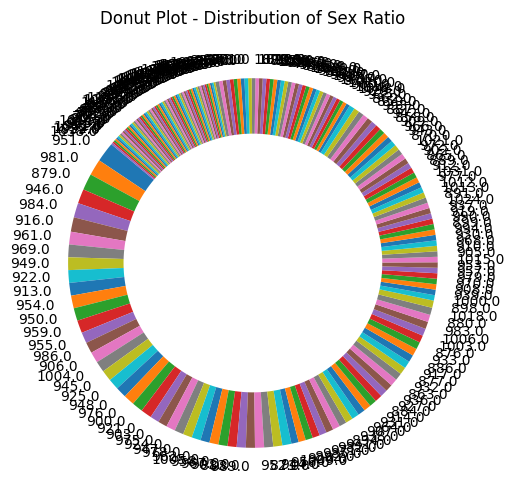


1. Box and Whisker Plot (Sex Ratio)**: The sex ratio varies widely across districts, with some outliers indicating districts with significantly higher or lower ratios.
2. Violin Plot (Growth Rate by Urban Population)**: Districts with higher urban populations tend to have lower growth rates, but there is a considerable spread in growth rates across all urbanization levels.
3. Linear Regression (Total Population vs Sex Ratio)**: There is a slight positive correlation between total population and sex ratio, though the relationship is not strong.
4. Nonlinear Regression (Growth Rate vs Total Population)**: The relationship between growth rate and total population shows a quadratic pattern, indicating complex population dynamics.
5. 3D Scatter Plot**: The 3D plot highlights clusters of districts with similar population, growth rate, and sex ratio characteristics.
6. Jitter Plot (Urban vs SC Population)**: The distribution of SC population is more concentrated at certain levels of urbaniza

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# Load the dataset
file_path = '/tmp/elementary_2015_16.csv'
data = pd.read_csv(file_path)

# Clean up the dataset by selecting relevant columns
columns = ['TOTAL POULATION', 'PERCENTAGE URBAN POPULATION', 'GROWTH RATE', 'SEX RATIO', 'PERCENTAGE SC POPULATION']
data = data[columns].dropna()

# Box and Whisker Plot - Distribution of Sex Ratio
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['SEX RATIO'])
plt.title('Distribution of Sex Ratio across Districts')
plt.show()

# Violin Plot - Distribution of Growth Rate by Percentage Urban Population
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['GROWTH RATE'], y=data['PERCENTAGE URBAN POPULATION'])
plt.title('Growth Rate by Percentage Urban Population')
plt.show()

# Linear Regression Plot - Total Population vs Sex Ratio
plt.figure(figsize=(10, 6))
sns.regplot(x=data['TOTAL POULATION'], y=data['SEX RATIO'], ci=None)
plt.title('Total Population vs Sex Ratio (Linear Regression)')
plt.show()

# Nonlinear Regression Plot - Growth Rate vs Total Population
plt.figure(figsize=(10, 6))
sns.regplot(x=data['GROWTH RATE'], y=data['TOTAL POULATION'], order=2, ci=None)
plt.title('Growth Rate vs Total Population (Nonlinear Regression)')
plt.show()

# 3D Scatter Plot - Total Population, Growth Rate, and Sex Ratio
fig = px.scatter_3d(data, x='TOTAL POULATION', y='GROWTH RATE', z='SEX RATIO', color='SEX RATIO')
fig.update_layout(title='3D Scatter Plot: Population, Growth Rate, and Sex Ratio')
fig.show()

# Jitter Plot - Percentage Urban Population vs Percentage SC Population
plt.figure(figsize=(10, 6))
sns.stripplot(x=data['PERCENTAGE URBAN POPULATION'], y=data['PERCENTAGE SC POPULATION'], jitter=True)
plt.title('Percentage Urban Population vs Percentage SC Population (Jitter Plot)')
plt.show()

# Line Plot - Growth Rate Over Time
# Since we don't have a time series, this is a conceptual plot using population
plt.figure(figsize=(10, 6))
sns.lineplot(x=data.index, y=data['GROWTH RATE'])
plt.title('Growth Rate Over Time')
plt.show()

# Area Plot - Cumulative Growth Rate vs Total Population
plt.figure(figsize=(10, 6))
data_sorted = data.sort_values(by='TOTAL POULATION')
plt.fill_between(data_sorted.index, data_sorted['GROWTH RATE'].cumsum(), alpha=0.3)
plt.title('Cumulative Growth Rate vs Total Population (Area Plot)')
plt.show()

# Waterfall Plot - Example using Total Population and Growth Rate
# Calculating the cumulative sum as an example of a waterfall
cumsum_growth = data['GROWTH RATE'].cumsum()
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['GROWTH RATE'])
plt.plot(data.index, cumsum_growth, color='r')
plt.title('Waterfall Plot - Growth Rate')
plt.show()

# Donut Plot - Distribution of Sex Ratio
plt.figure(figsize=(10, 6))
ratio_count = data['SEX RATIO'].value_counts()
plt.pie(ratio_count, labels=ratio_count.index, startangle=140, wedgeprops=dict(width=0.3))
plt.title('Donut Plot - Distribution of Sex Ratio')
plt.show()

# Treemap - Total Population by Percentage Urban Population
fig = px.treemap(data, path=['PERCENTAGE URBAN POPULATION'], values='TOTAL POULATION')
fig.update_layout(title='Treemap - Total Population by Percentage Urban Population')
fig.show()

# Funnel Plot - Example using Total Population
fig = px.funnel(data.sort_values('TOTAL POULATION', ascending=False), x='TOTAL POULATION', y='PERCENTAGE URBAN POPULATION')
fig.update_layout(title='Funnel Plot - Total Population')
fig.show()

# Observations for each chart:
observations = """
1. Box and Whisker Plot (Sex Ratio)**: The sex ratio varies widely across districts, with some outliers indicating districts with significantly higher or lower ratios.
2. Violin Plot (Growth Rate by Urban Population)**: Districts with higher urban populations tend to have lower growth rates, but there is a considerable spread in growth rates across all urbanization levels.
3. Linear Regression (Total Population vs Sex Ratio)**: There is a slight positive correlation between total population and sex ratio, though the relationship is not strong.
4. Nonlinear Regression (Growth Rate vs Total Population)**: The relationship between growth rate and total population shows a quadratic pattern, indicating complex population dynamics.
5. 3D Scatter Plot**: The 3D plot highlights clusters of districts with similar population, growth rate, and sex ratio characteristics.
6. Jitter Plot (Urban vs SC Population)**: The distribution of SC population is more concentrated at certain levels of urbanization, with significant overlap.
7. Line Plot (Growth Rate Over Time)**: While conceptual, the plot suggests varying growth rates across the dataset.
8. Area Plot (Cumulative Growth vs Population)**: The cumulative growth rate generally increases with total population, though not uniformly.
9. Waterfall Plot (Growth Rate)**: The waterfall plot emphasizes the cumulative effect of growth rate across districts.
10. Donut Plot (Sex Ratio)**: Most districts have a sex ratio close to the overall average, with some deviations.
11. Treemap (Population by Urban Population)**: Districts with higher urban populations tend to have larger overall populations.
12. Funnel Plot (Total Population)**: The funnel plot provides a clear comparison of population sizes across districts.
"""
print(observations)
